In [107]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")





In [108]:
df=pd.read_csv('Online_Courses.csv')

In [109]:
df.head()

,Unnamed: 0,Title,URL,Short Intro,Category,Sub-Category,Course Type,Language,Subtitle Languages,Skills,...,Course Short Intro,Weekly study,Premium course,What's include,Rank,Created by,Program,Number of ratings,Price,COURSE CATEGORIES
0,0,Machine Learning Specialization,https://www.coursera.org/specializations/machi...,#BreakIntoAI with Machine Learning Specializat...,Data Science,Machine Learning,Specialization,English,Subtitles: English,"Decision Trees, Artificial Neural Network, Log...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Introduction to Data Science Specialization,https://www.coursera.org/specializations/intro...,Launch your career in data science. Gain found...,Data Science,Data Analysis,Specialization,English,"Subtitles: English, Arabic, French, Portuguese...","Data Science, Relational Database Management S...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Data Science Fundamentals with Python and SQL ...,https://www.coursera.org/specializations/data-...,Build the Foundation for your Data Science car...,Data Science,Data Analysis,Specialization,English,"Subtitles: English, Arabic, French, Portuguese...","Data Science, Github, Python Programming, Jupy...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Key Technologies for Business Specialization,https://www.coursera.org/specializations/key-t...,Get Ahead with Key Business Technologies. Gain...,Business,Business Essentials,Specialization,English,"Subtitles: English, Arabic, French, Portuguese...","Data Science, Artificial Intelligence (AI), Bu...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Deep Learning Specialization,https://www.coursera.org/specializations/deep-...,Become a Machine Learning expert. Master the f...,Data Science,Machine Learning,Specialization,English,"Subtitles: English, Chinese (Traditional), Ara...","Artificial Neural Network, Convolutional Neura...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
df.isnull().sum()

Unnamed: 0                  0
Title                       0
URL                         0
Short Intro                52
Category                 5273
Sub-Category             5273
Course Type              5273
Language                 5273
Subtitle Languages       5290
Skills                   5993
Instructors              5284
Rating                   5350
Number of viewers        5397
Duration                  148
Site                        0
Program Type             7810
Courses                  3148
Level                    7911
Number of Reviews        8045
Unique Projects          8092
Prequisites              7811
What you learn           7814
Related Programs         8007
Monthly access           7994
6-Month access           8090
4-Month access           8054
3-Month access           8066
5-Month access           8090
2-Month access           8082
School                   7821
Topics related to CRM    3426
ExpertTracks             3249
FAQs                     7009
Course Tit

In [111]:

threshold = 0.9  
missing_percentage = df.isnull().mean()  
df_cleaned = df.drop(columns=missing_percentage[missing_percentage > threshold].index)


In [112]:
df_cleaned.isnull().sum()

Unnamed: 0                  0
Title                       0
URL                         0
Short Intro                52
Category                 5273
Sub-Category             5273
Course Type              5273
Language                 5273
Subtitle Languages       5290
Skills                   5993
Instructors              5284
Rating                   5350
Number of viewers        5397
Duration                  148
Site                        0
Courses                  3148
Topics related to CRM    3426
ExpertTracks             3249
FAQs                     7009
Course Title             3249
Course URL               3249
Course Short Intro       3249
Weekly study             3249
Premium course           6470
dtype: int64

In [113]:
df = df_cleaned[['Title','Short Intro','Skills','Duration','Rating','Number of viewers','Category','Topics related to CRM','Instructors','Sub-Category','Course Type']]

In [114]:
df.isnull().sum()

Title                       0
Short Intro                52
Skills                   5993
Duration                  148
Rating                   5350
Number of viewers        5397
Category                 5273
Topics related to CRM    3426
Instructors              5284
Sub-Category             5273
Course Type              5273
dtype: int64

In [115]:
df.shape

(8092, 11)

In [116]:
df.isnull().sum()

Title                       0
Short Intro                52
Skills                   5993
Duration                  148
Rating                   5350
Number of viewers        5397
Category                 5273
Topics related to CRM    3426
Instructors              5284
Sub-Category             5273
Course Type              5273
dtype: int64

In [117]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
        text = text.strip()
    else:
        text = ''
    return text

df['Title'] = df['Title'].apply(clean_text)
df['Short Intro'] = df['Short Intro'].apply(clean_text)
df['Skills'] = df['Skills'].apply(clean_text)
df['Instructors'] = df['Instructors'].apply(clean_text)

numerical_cols = ['Duration', 'Rating', 'Number of viewers']
for col in numerical_cols:
    df[col] = df[col].astype(str).str.replace(',', '').str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')

tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf.fit_transform(df['Title'])

kmeans = KMeans(n_clusters=6, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_tfidf)

categorical_cols = ['Category', 'Topics related to CRM', 'Sub-Category', 'Course Type']
for col in categorical_cols:
    df[col] = df.groupby('Cluster')[col].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

for col in numerical_cols:
    df[col] = df.groupby('Cluster')[col].transform(lambda x: x.fillna(x.median()))

text_cols = ['Short Intro', 'Skills', 'Instructors']
for col in text_cols:
    df[col] = df.groupby('Cluster')[col].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

print(df.isnull().sum())


Title                       0
Short Intro                 0
Skills                      0
Duration                 8092
Rating                   1246
Number of viewers           0
Category                    0
Topics related to CRM       0
Instructors                 0
Sub-Category                0
Course Type                 0
Cluster                     0
dtype: int64


In [118]:
df.drop('Duration', axis=1, inplace=True)


In [119]:

rating_median = df['Rating'].median()

df['Rating'].fillna(rating_median, inplace=True)


In [120]:
df.isnull().sum()

Title                    0
Short Intro              0
Skills                   0
Rating                   0
Number of viewers        0
Category                 0
Topics related to CRM    0
Instructors              0
Sub-Category             0
Course Type              0
Cluster                  0
dtype: int64

In [121]:
df.columns

Index(['Title', 'Short Intro', 'Skills', 'Rating', 'Number of viewers',
       'Category', 'Topics related to CRM', 'Instructors', 'Sub-Category',
       'Course Type', 'Cluster'],
      dtype='object')

In [122]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [123]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob

In [124]:
df['title_length'] = df['Title'].apply(lambda x: len(x))
df['title_word_count'] = df['Title'].apply(lambda x: len(x.split()))
df['title_sentiment'] = df['Title'].apply(lambda x: TextBlob(x).sentiment.polarity)
tfidf = TfidfVectorizer(max_features=10)
title_tfidf = tfidf.fit_transform(df['Title'])
title_keywords = pd.DataFrame(title_tfidf.toarray(), columns=tfidf.get_feature_names_out())
df = pd.concat([df, title_keywords], axis=1)

In [125]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Short Intro'])
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda_topics = lda.fit_transform(X)
lda_df = pd.DataFrame(lda_topics, columns=[f'topic_{i+1}' for i in range(3)])
df = pd.concat([df, lda_df], axis=1)

In [126]:
df['normalized_rating'] = df['Rating'] / df['Rating'].max()
df['category_avg_rating'] = df.groupby('Category')['Rating'].transform('mean')

In [127]:
df['intro_length'] = df['Short Intro'].apply(lambda x: len(x))
df['intro_word_count'] = df['Short Intro'].apply(lambda x: len(x.split()))
df['intro_sentiment'] = df['Short Intro'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [128]:
df['log_viewers'] = df['Number of viewers'].apply(lambda x: np.log(x + 1))
df['viewers_bins'] = pd.cut(df['Number of viewers'], bins=[0, 50, 200, 1000, 5000], labels=['low', 'medium', 'high', 'very high'])



In [129]:
category_encoder = OneHotEncoder()
category_encoded = category_encoder.fit_transform(df[['Category']]).toarray()
category_df = pd.DataFrame(category_encoded, columns=category_encoder.get_feature_names_out())
df = pd.concat([df, category_df], axis=1)

In [130]:
df['crm_related'] = df['Topics related to CRM'].apply(lambda x: 1 if 'CRM' in x else 0)
df['crm_topic_count'] = df['Topics related to CRM'].apply(lambda x: x.count('CRM'))

In [131]:
df['instructor_count'] = df['Instructors'].apply(lambda x: len(x.split(',')))
df['instructor_avg_rating'] = df.groupby('Instructors')['Rating'].transform('mean')

In [132]:


df['cluster_size'] = df.groupby('Cluster')['Cluster'].transform('size')
df['cluster_density'] = df['cluster_size'] / df['Cluster'].nunique()


In [133]:
df.columns

Index(['Title', 'Short Intro', 'Skills', 'Rating', 'Number of viewers',
       'Category', 'Topics related to CRM', 'Instructors', 'Sub-Category',
       'Course Type', 'Cluster', 'title_length', 'title_word_count',
       'title_sentiment', 'business', 'data', 'design', 'digital',
       'introduction', 'learning', 'management', 'marketing', 'science',
       'specialization', 'topic_1', 'topic_2', 'topic_3', 'normalized_rating',
       'category_avg_rating', 'intro_length', 'intro_word_count',
       'intro_sentiment', 'log_viewers', 'viewers_bins',
       'Category_Arts and Humanities', 'Category_Business',
       'Category_Ciencia de Datos', 'Category_Ciencias de la Computación',
       'Category_Computer Science', 'Category_Data Science', 'Category_Health',
       'Category_Information Technology', 'Category_Language Learning',
       'Category_Math and Logic', 'Category_Negocios', 'Category_Negócios',
       'Category_Personal Development',
       'Category_Physical Science and E

In [134]:
df.head()

,Title,Short Intro,Skills,Rating,Number of viewers,Category,Topics related to CRM,Instructors,Sub-Category,Course Type,...,Category_Social Sciences,Category_Tecnologia da informação,Category_データサイエンス,Category_计算机科学,crm_related,crm_topic_count,instructor_count,instructor_avg_rating,cluster_size,cluster_density
0,machine learning specialization,breakintoai machine learning specialization ma...,decision trees artificial neural network logis...,4.7,10438.0,Data Science,Unknown,andrew ng eddy shyu aarti bagul geoff ladwig,Machine Learning,Specialization,...,0.0,0.0,0.0,0.0,0,0,1,4.7,355,59.166667
1,introduction data science specialization,launch career data science gain foundational d...,data science relational database management sy...,4.6,11927.0,Data Science,Big Data & Analytics / Business Ethics / Busi...,rav ahuja alex aklson aije egwaikhide svetlana...,Data Analysis,Specialization,...,0.0,0.0,0.0,0.0,1,2,1,4.6,562,93.666667
2,data science fundamentals python sql specializ...,build foundation data science career develop h...,data science github python programming jupyter...,4.6,2295.0,Data Science,Big Data & Analytics / Business Ethics / Busi...,aije egwaikhide svetlana levitan romeo kienzle...,Data Analysis,Specialization,...,0.0,0.0,0.0,0.0,1,2,1,4.6,562,93.666667
3,key technologies business specialization,get ahead key business technologies gain found...,data science artificial intelligence ai busine...,4.7,1232.0,Business,Unknown,rav ahuja alex aklson,Business Essentials,Specialization,...,0.0,0.0,0.0,0.0,0,0,1,4.7,355,59.166667
4,deep learning specialization,become machine learning expert master fundamen...,artificial neural network convolutional neural...,4.7,129253.0,Data Science,Unknown,andrew ng kian katanforoosh younes bensouda mo...,Machine Learning,Specialization,...,0.0,0.0,0.0,0.0,0,0,1,4.7,355,59.166667


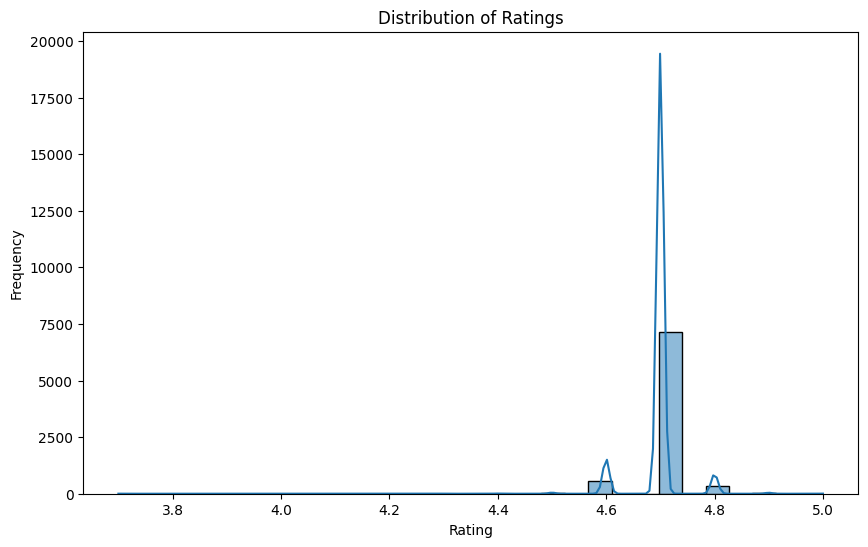

In [135]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], kde=True, bins=30)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

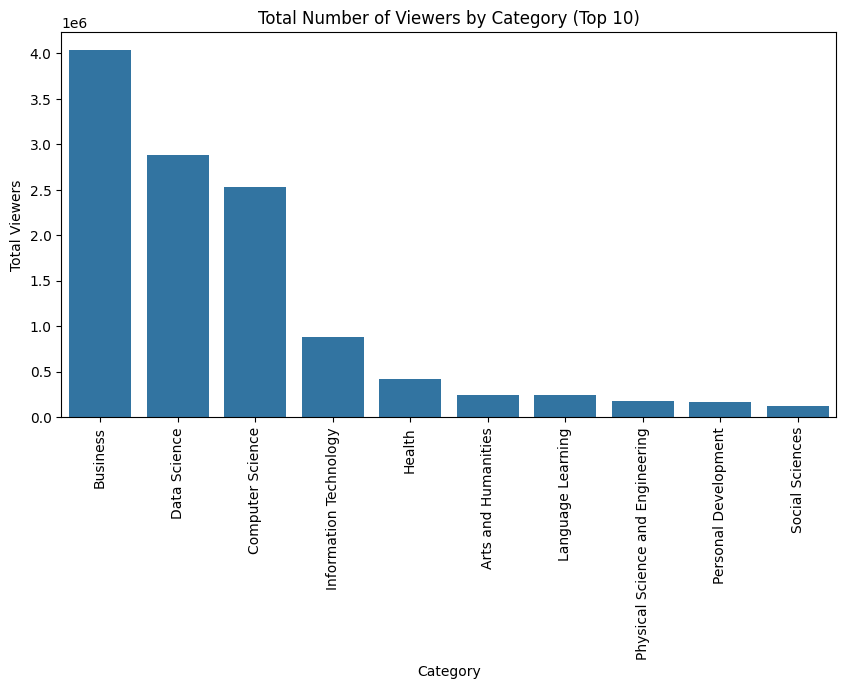

In [136]:

category_viewers = df.groupby('Category')['Number of viewers'].sum().reset_index()

top_10_categories = category_viewers.sort_values(by='Number of viewers', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Number of viewers', data=top_10_categories, estimator=sum)
plt.title('Total Number of Viewers by Category (Top 10)')
plt.xlabel('Category')
plt.ylabel('Total Viewers')
plt.xticks(rotation=90)
plt.show()


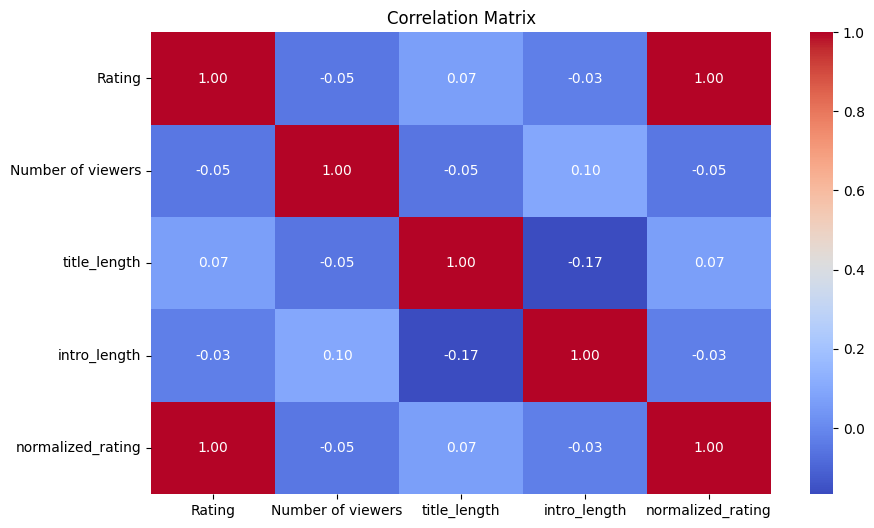

In [137]:
correlation_matrix = df[['Rating', 'Number of viewers', 'title_length', 'intro_length', 'normalized_rating']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [138]:
text_title = ' '.join(df['title_sentiment'].dropna().astype(str))
text_intro = ' '.join(df['intro_sentiment'].dropna().astype(str))

In [139]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


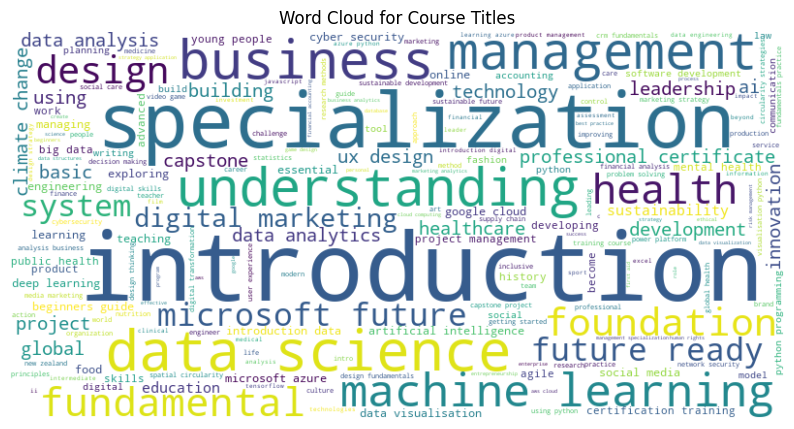

In [140]:
from wordcloud import WordCloud

text_title = ' '.join(df['Title'].dropna().astype(str))


wordcloud_title = WordCloud(width=800, height=400, background_color='white').generate(text_title)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.title('Word Cloud for Course Titles')
plt.axis('off')
plt.show()


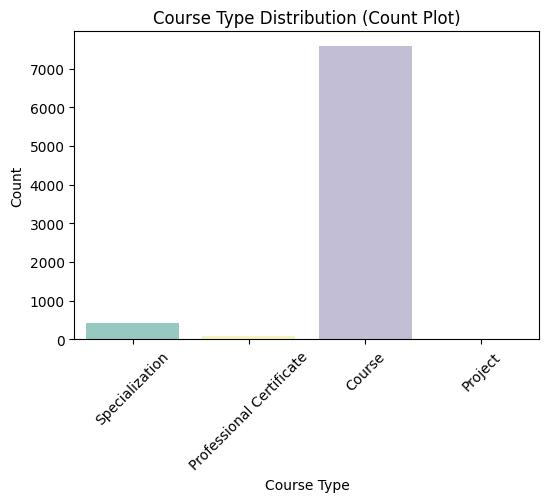

In [141]:


plt.figure(figsize=(6, 4))
sns.countplot(x='Course Type', data=df, palette='Set3')

plt.title('Course Type Distribution (Count Plot)')
plt.xlabel('Course Type')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()


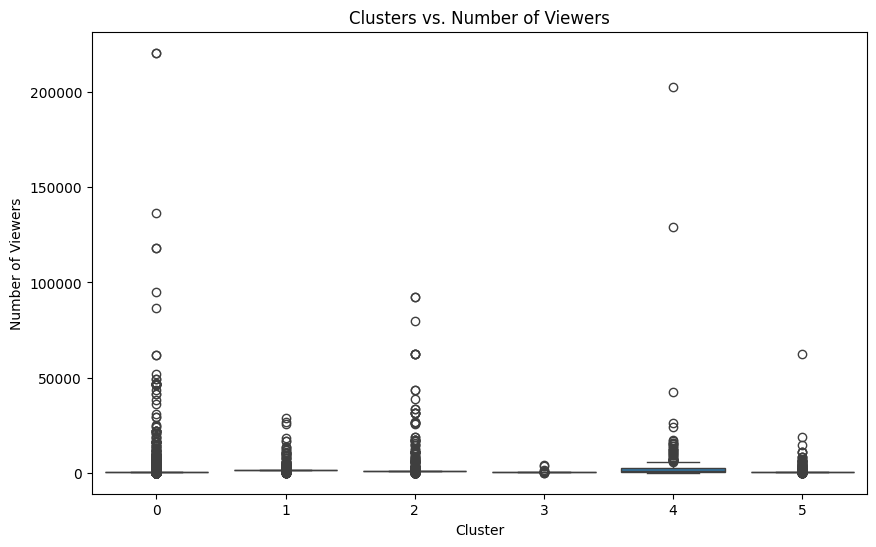

In [142]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Number of viewers', data=df)
plt.title('Clusters vs. Number of Viewers')
plt.xlabel('Cluster')
plt.ylabel('Number of Viewers')
plt.show()

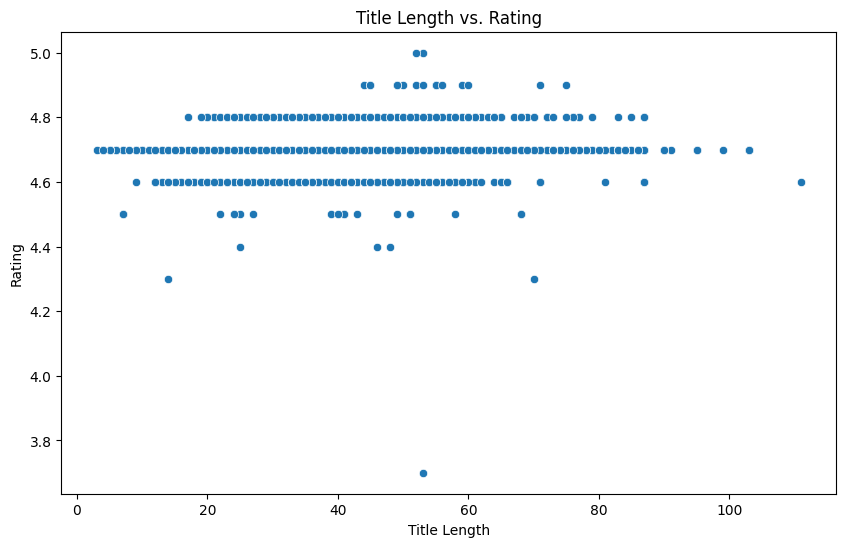

In [143]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='title_length', y='Rating', data=df)
plt.title('Title Length vs. Rating')
plt.xlabel('Title Length')
plt.ylabel('Rating')
plt.show()

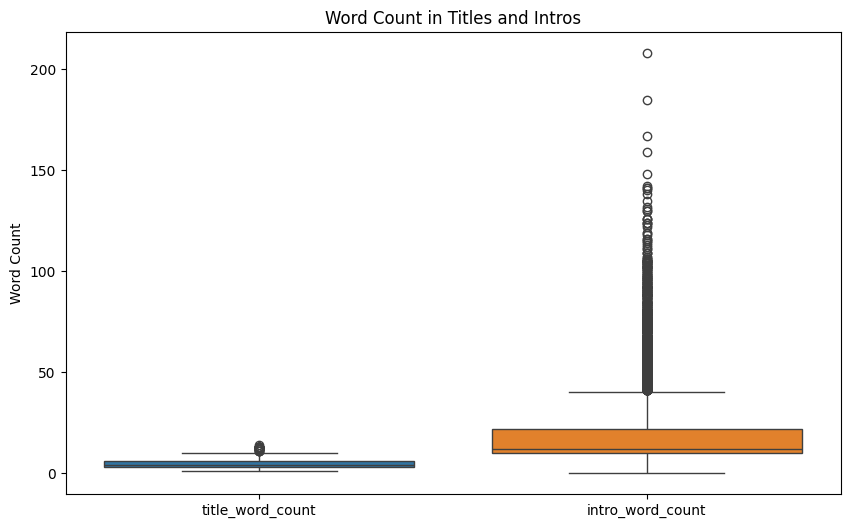

In [144]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['title_word_count', 'intro_word_count']])
plt.title('Word Count in Titles and Intros')
plt.ylabel('Word Count')
plt.show()

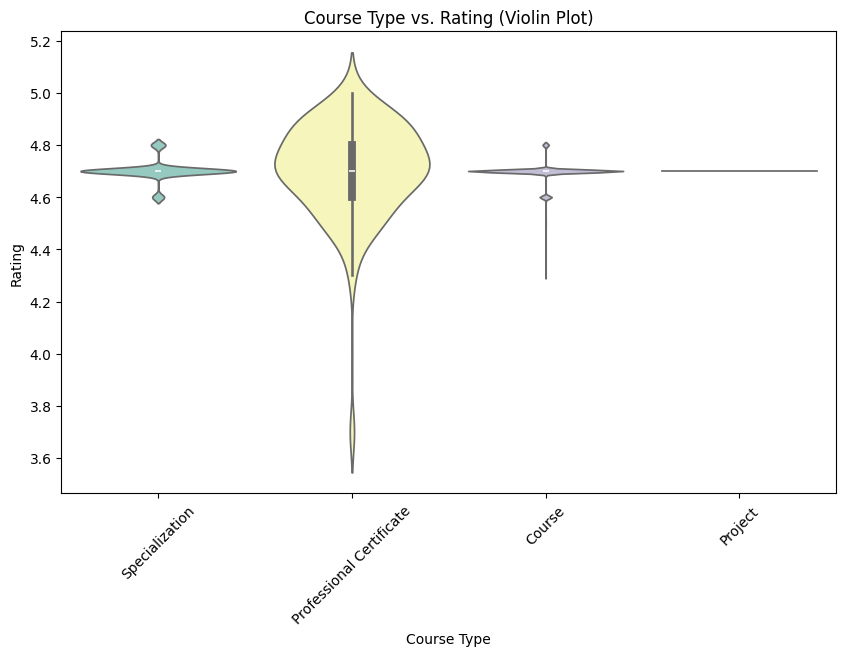

In [145]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Course Type', y='Rating', data=df, palette='Set3')

plt.title('Course Type vs. Rating (Violin Plot)')
plt.xlabel('Course Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


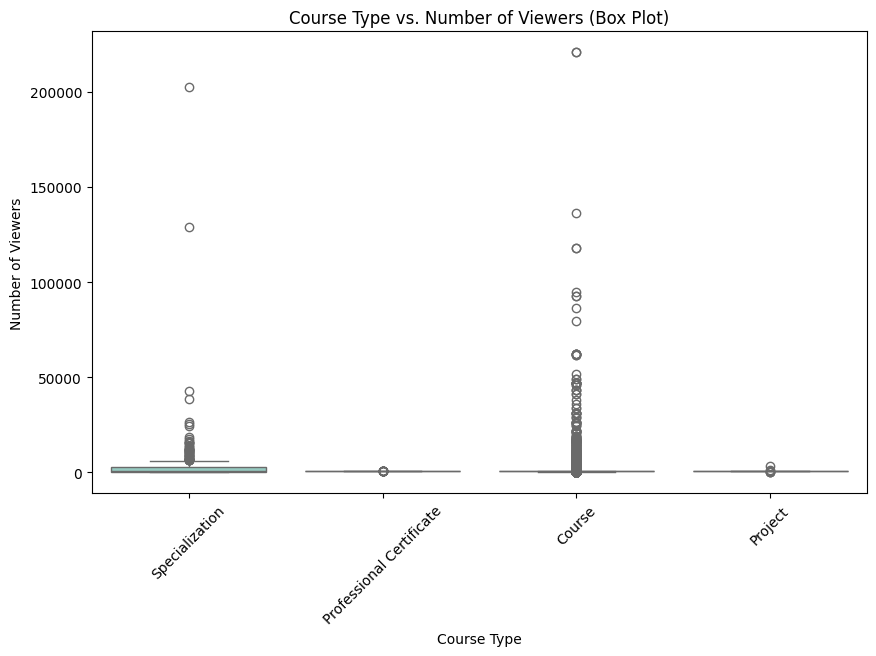

In [146]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Course Type', y='Number of viewers', data=df, palette='Set3')


plt.title('Course Type vs. Number of Viewers (Box Plot)')
plt.xlabel('Course Type')
plt.ylabel('Number of Viewers')
plt.xticks(rotation=45)
plt.show()


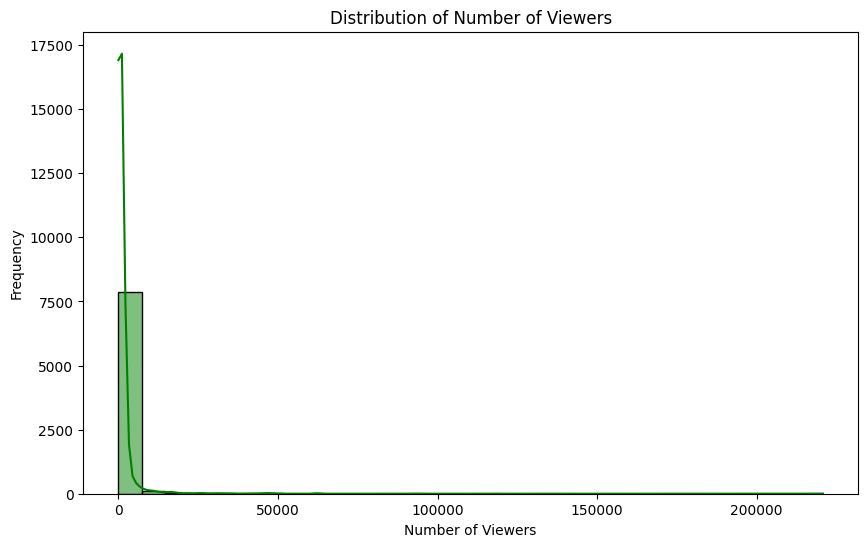

In [147]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Number of viewers'], kde=True, color='green', bins=30)


plt.title('Distribution of Number of Viewers')
plt.xlabel('Number of Viewers')
plt.ylabel('Frequency')
plt.show()


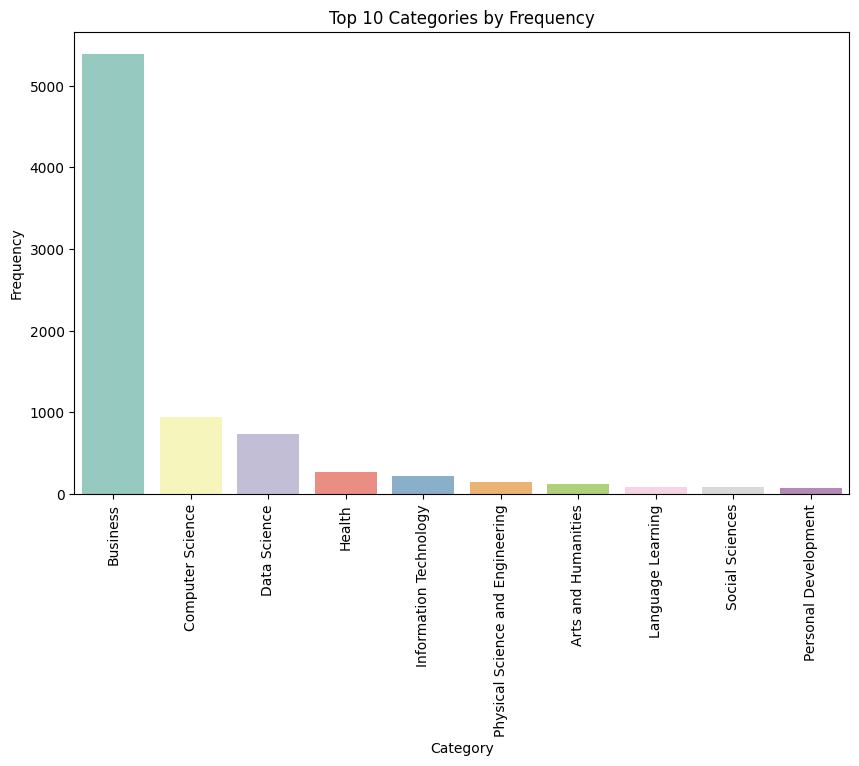

In [148]:



category_counts = df['Category'].value_counts().head(10) 

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='Set3')

# Add title and labels
plt.title('Top 10 Categories by Frequency')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  
plt.show()


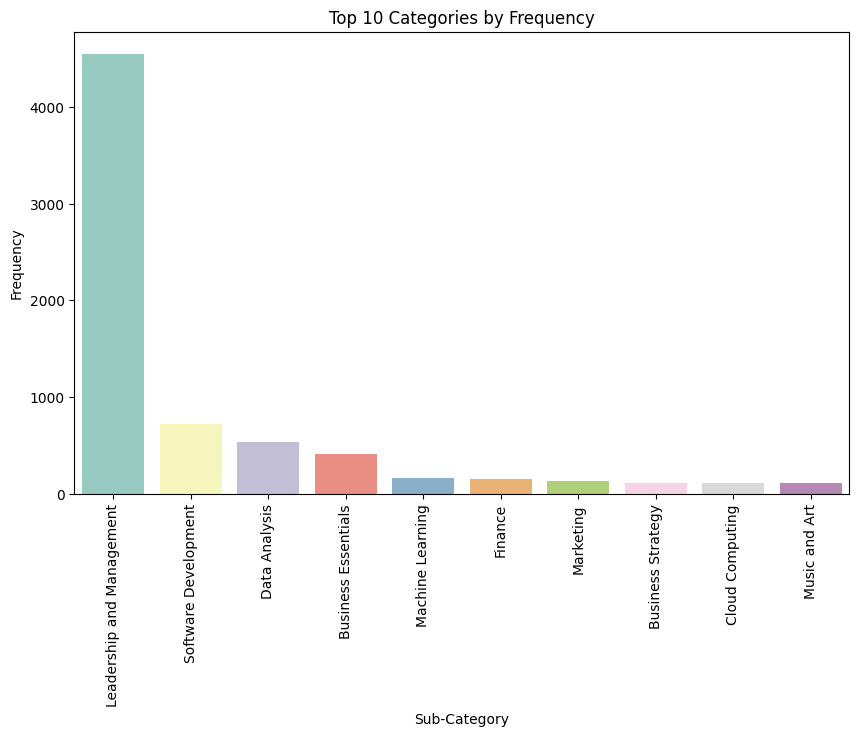

In [149]:



category_counts = df['Sub-Category'].value_counts().head(10)  

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='Set3')


plt.title('Top 10 Categories by Frequency')
plt.xlabel('Sub-Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90) 
plt.show()


In [150]:
df.shape

(8092, 58)